In [452]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import scipy.io as sio
import pandas as pd
import datetime
import xarray as xr
from salishsea_tools import tidetools, geo_tools, viz_tools
import ONC_patrols as onc
from IPython.display import Image

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

%matplotlib inline

In [2]:
grid = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
bathy, X, Y = tidetools.get_bathy_data(grid)

In [255]:
nowcast = xr.open_dataset(
    'https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSg3DTracerFields1hV17-02')

In [256]:
nowcast_salinity = nowcast.salinity
nowcast_temperature = nowcast.temperature

In [239]:
mesh = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc')
tmask = mesh.variables['tmask'][:]

In [3]:
ctd_2015 = sio.loadmat('/ocean/rich/home/metro/venus_adcp/matlabPSF/CitSci_Final.mat')
ctd_2016 = sio.loadmat('/ocean/rich/home/metro/venus_adcp/matlabPSF/CitSci_Final2016.mat')

In [5]:
ctd_2015_data = ctd_2015[list(ctd_2015.keys())[3]]
ctd_2016_data = ctd_2016[list(ctd_2016.keys())[3]]

In [7]:
ctd_2015_dtype = ctd_2015_data.dtype
ctd_2016_dtype = ctd_2016_data.dtype

In [8]:
ctd2015data = {n: ctd_2015_data[n][0, 0] for n in ctd_2015_dtype.names}
ctd2016data = {n: ctd_2016_data[n][0, 0] for n in ctd_2016_dtype.names}

In [9]:
print(ctd2015data.keys())
print(ctd2016data.keys())

dict_keys(['patrol', 'ID', 'stn', 'mtime', 'lat', 'long', 'pr', 'mtimes', 'temp', 'sal', 'cond', 'depth', 'stnN', 'o2', 'chl', 'comment'])
dict_keys(['patrol', 'ID', 'stn', 'mtime', 'lat', 'long', 'pr', 'mtimes', 'temp', 'sal', 'cond', 'depth', 'stnN', 'o2SAT', 'o2uM', 'chl', 'comment'])


In [297]:
Stn2015 = ctd2015data['stnN'][0,:]

In [298]:
Stn2016 = ctd2016data['stnN'][0,:]

In [157]:
ID_2015 = np.array([ctd2015data['ID'][0,:][n][0] for n in range(2142)])
ID_2016 = np.array([ctd2016data['ID'][0,:][n][0] for n in range(1165)])

In [175]:
patrol_2015 = np.array([ctd2015data['patrol'][0,:]])
patrol_2016 = np.array([ctd2016data['patrol'][0,:]])

In [73]:
ctd2016data['lat'][0,:].shape

(1165,)

In [43]:
ctd2015data['long'][0,:].shape

(2142,)

In [99]:
base = datetime.datetime(2000, 1, 1)
dates_2015 = np.array([])
py_ctd_2015_times = np.array([base for i in range(2142)])
for n in range(2142):
    a = ((datetime.datetime.fromordinal(int(ctd2015data['mtime'][0,:][n])))
         + datetime.timedelta(days=ctd2015data['mtime'][0,:][n]%1)
         - datetime.timedelta(days = 366))
    py_ctd_2015_times[n] = a
    dates_2015 = np.append(dates_2015, datetime.date(a.year, a.month, a.day))
py_ctd_2016_times = np.array([base for i in range(1165)])
dates_2016 = np.array([])
for n in range(1165):
    b = ((datetime.datetime.fromordinal(int(ctd2016data['mtime'][0,:][n])))
         + datetime.timedelta(days=ctd2016data['mtime'][0,:][n]%1)
         - datetime.timedelta(days = 366))
    py_ctd_2016_times[n] = b
    dates_2016 = np.append(dates_2016, datetime.date(b.year, b.month, b.day))

In [299]:
data = {'mtime' : np.append(ctd2015data['mtime'][0,:], ctd2016data['mtime'][0,:]),
        'lat' : np.append(ctd2015data['lat'][0,:], ctd2016data['lat'][0,:]),
        'lon' : np.append(ctd2015data['long'][0,:], ctd2016data['long'][0,:]),
        'ID' : np.append(ID_2015, ID_2106),
        'patrol': np.append(patrol_2015, patrol_2016),
        'time': np.append(py_ctd_2015_times, py_ctd_2016_times),
        'date': np.append(dates_2015, dates_2016),
        'station': np.append(Stn2015, Stn2016)}
stationdata = pd.DataFrame(data)
stationdata[:10]

,ID,date,lat,lon,mtime,patrol,station,time
0,PSFLND2015-02-16_01,2015-02-16,49.986738,-124.822141,736011.697907,1,1,2015-02-16 16:44:59.124996
1,PSFLND2015-02-16_02,2015-02-16,49.986782,-124.822243,736011.702466,1,1,2015-02-16 16:51:33.055559
2,PSFLND2015-02-16_03,2015-02-16,49.961587,-124.856736,736011.727781,1,2,2015-02-16 17:28:00.277814
3,PSFLND2015-02-16_04,2015-02-16,49.960653,-124.856381,736011.733140,1,2,2015-02-16 17:35:43.314781
4,PSFLND2015-02-16_05,2015-02-16,50.078240,-124.868398,736011.785290,1,4,2015-02-16 18:50:49.041700
5,PSFLND2015-02-16_06,2015-02-16,50.077821,-124.868130,736011.791713,1,4,2015-02-16 19:00:03.987151
6,PSFLND2015-02-16_07,2015-02-16,50.100239,-124.739698,736011.847963,1,7,2015-02-16 20:21:03.970587
7,PSFLND2015-02-16_08,2015-02-16,50.100432,-124.740207,736011.854413,1,7,2015-02-16 20:30:21.264697
8,PSFLND2015-02-16_09,2015-02-16,50.083331,-124.789848,736011.870040,1,8,2015-02-16 20:52:51.466668
9,PSFLND2015-02-16_10,2015-02-16,50.083181,-124.789804,736011.876294,1,8,2015-02-16 21:01:51.833360


In [300]:
Lund = stationdata.loc[stationdata['patrol'] == 1]

In [201]:
Lund.shape

(456, 7)

In [202]:
for index in Lund.index[:5]:
    Yind, Xind = geo_tools.find_closest_model_point(Lund.loc[[index]]['lon'].values[0],
                                                   Lund.loc[[index]]['lat'].values[0], 
                                                   X, Y, land_mask = bathy.mask)
    print(index, Yind, Xind)

0 707 180
1 707 180
2 705 171
3 705 171
4 729 184


In [213]:
masked_2015_depths = np.ma.masked_invalid(ctd2015data['depth'])
masked_2015_sals = np.ma.masked_invalid(ctd2015data['sal'])
masked_2015_temps = np.ma.masked_invalid(ctd2015data['temp'])
masked_2016_depths = np.ma.masked_invalid(ctd2016data['depth'])
masked_2016_sals = np.ma.masked_invalid(ctd2016data['sal'])
masked_2016_temps = np.ma.masked_invalid(ctd2016data['temp'])

In [233]:
for n in range(2142):
    if np.ma.count(masked_2015_temps[:,n]) > 190:
        print(n)

In [234]:
masked_depths = np.ma.masked_array(np.zeros((200,3307)), mask = True)
masked_sals = np.ma.masked_array(np.zeros((200,3307)), mask = True)
masked_temps = np.ma.masked_array(np.zeros((200,3307)), mask = True)
for n in range(2142):
    masked_depths[:, n].mask = masked_2015_depths[:200,n].mask
    masked_depths[:,n] = masked_2015_depths[:200,n]
    masked_sals[:,n].mask = masked_2015_sals[:200,n].mask
    masked_sals[:,n] = masked_2015_sals[:200,n]
    masked_temps[:,n].mask = masked_2015_temps[:200,n].mask
    masked_temps[:,n] = masked_2015_temps[:200,n]
for n in range(1165):
    masked_depths[:, n+2142].mask = masked_2016_depths[:,n].mask
    masked_depths[:,n+2142] = masked_2016_depths[:,n]
    masked_sals[:,n+2142].mask = masked_2016_sals[:,n].mask
    masked_sals[:,n+2142] = masked_2016_sals[:,n]
    masked_temps[:,n+2142].mask = masked_2016_temps[:,n].mask
    masked_temps[:,n+2142] = masked_2016_temps[:,n]

In [237]:
deptht = nowcast.depth.values

In [277]:
from matplotlib.colors import LogNorm

In [435]:
def compare(patrolonlydata):
    fig, ax = plt.subplots(1,3, figsize = (21,8))
    end_index = patrolonlydata.shape[0]
    list_of_model_sal = np.ma.masked_array(np.zeros((200,end_index)), mask = True)
    list_of_model_temp = np.ma.masked_array(np.zeros((200,end_index)), mask = True)
    m = 0
    for index in patrolonlydata.index:
        Yind, Xind = geo_tools.find_closest_model_point(patrolonlydata.loc[[index]]['lon'].values[0],
                                                       patrolonlydata.loc[[index]]['lat'].values[0], 
                                                       X, Y, land_mask = bathy.mask)
        date = pd.Timestamp(patrolonlydata.loc[[index]]['time'].values[0]).to_pydatetime()
        for n in range(200):
            if masked_sals.mask[n, index] == False:
                land = np.abs((deptht - masked_depths[n, index])).argmin()
                if tmask[0,land,Yind,Xind] == 1:
                    if date.minute < 30:
                        before = datetime.datetime(year = date.year, month = date.month, 
                                                   day = date.day, hour = (date.hour), 
                                                   minute = 30) - datetime.timedelta(hours=1)
                        delta = (date - before).seconds / 3600
                        s_val = (delta * ((nowcast_salinity
                               .sel(time = before, depth = masked_depths[n, index], 
                                    method = 'nearest')
                               .isel(gridY = Yind, gridX = Xind)).values) + 
                               (1- delta)*((nowcast_salinity
                               .sel(time = before + datetime.timedelta(hours=1), 
                                    depth = masked_depths[n, index], method = 'nearest')
                               .isel(gridY = Yind, gridX = Xind)).values))
                        s_tem = (delta * ((nowcast_temperature
                               .sel(time = before, depth = masked_depths[n, index], 
                                    method = 'nearest')
                               .isel(gridY = Yind, gridX = Xind)).values) + 
                               (1- delta)*((nowcast_temperature
                               .sel(time = before + datetime.timedelta(hours=1), 
                                    depth = masked_depths[n, index], method = 'nearest')
                               .isel(gridY = Yind, gridX = Xind)).values))
                    if date.minute >= 30:
                        before = datetime.datetime(year = date.year, month = date.month, 
                                                   day = date.day, 
                                                   hour = (date.hour), minute = 30)
                        delta = (date - before).seconds / 3600
                        s_val = (delta * ((nowcast_salinity
                               .sel(time = before, depth = masked_depths[n,index], 
                                    method = 'nearest')
                               .isel(gridY = Yind, gridX = Xind)).values) + 
                               (1- delta)*((nowcast_salinity
                               .sel(time = before + datetime.timedelta(hours=1), 
                                    depth = masked_depths[n,index], method = 'nearest')
                               .isel(gridY = Yind, gridX = Xind)).values))
                        s_tem = (delta * ((nowcast_temperature
                               .sel(time = before, depth = masked_depths[n,index], 
                                    method = 'nearest')
                               .isel(gridY = Yind, gridX = Xind)).values) + 
                               (1- delta)*((nowcast_temperature
                               .sel(time = before + datetime.timedelta(hours=1), 
                                    depth = masked_depths[n,index], method = 'nearest')
                               .isel(gridY = Yind, gridX = Xind)).values))
                    list_of_model_sal[n, m].mask = False
                    list_of_model_sal[n, m] = s_val
                    list_of_model_temp[n, m].mask = False
                    list_of_model_temp[n, m] = s_tem
        m = m + 1
    #scatter
    l = 0
    for n in patrolonlydata.index:
        ax[0].plot(np.ma.masked_invalid(masked_sals[:,n]), 
                  np.ma.masked_invalid(list_of_model_sal[:,l]), 
                  'b.')
        l = l + 1
    ax[0].plot(np.arange(16, 32), np.arange(16,32), 'r-')
    ax[0].grid('on')
    ax[0].set_title('Observed Vs Modeled')
    ax[0].set_ylabel('Model')
    ax[0].set_xlabel('Observed')
    
    print('salinity: bias =  ' + str(-np.mean(np.ma.masked_invalid(np.array([masked_sals[:,n] for n in patrolonlydata.index]).T.flatten())) 
                           + np.mean(list_of_model_sal.flatten())))
    print('salinity: RMSE = ' + str(np.sqrt(np.sum((list_of_model_sal.flatten() 
                                              - np.array([masked_sals[:,n] 
                                                      for n in patrolonlydata.index]).T.flatten())**2) 
                                      / np.ma.count(list_of_model_sal.flatten()))))
    xbar = np.mean(np.ma.masked_invalid(np.array([masked_sals[:,n] for n in patrolonlydata.index])))
    print('salinity: Willmott = ' + str(1-(np.sum((list_of_model_sal.flatten() - 
                                            np.array([masked_sals[:,n] 
                                                      for n in patrolonlydata.index]).T.flatten())**2)  / 
                                     np.sum((np.abs(list_of_model_sal.flatten() - xbar) 
                                             + np.abs(np.array([masked_sals[:,n] 
                                                      for n in patrolonlydata.index]).T.flatten() 
                                                               - xbar))**2))))
    #depth profile
    k = 0
    for n in patrolonlydata.index:
        ax[1].plot(np.ma.masked_invalid(masked_sals[:,n]), 
                  np.ma.masked_invalid(masked_depths[:,n]), 
                  linestyle='-', c='gray', alpha = 0.1, linewidth=5)
        ax[1].plot(list_of_model_sal[:,k], 
                   np.ma.masked_invalid(masked_depths[:,k]), 
                 linestyle='-', c='k', alpha = 0.2)
        k = k + 1
    ax[1].set_ylim(150,0)
    ax[1].set_ylabel('Depth (m)')
    ax[1].set_xlabel('Salinity')                       
      
    #map
    Yinds = np.array([])
    Xinds = np.array([])
    for n in patrolonlydata['station'].unique():
        Yind, Xind = geo_tools.find_closest_model_point(
            patrolonlydata.loc[patrolonlydata['station'] == n].iloc[0]['lon'],
            patrolonlydata.loc[patrolonlydata['station'] == n].iloc[0]['lat'],X, Y, land_mask = bathy.mask)
        Yinds = np.append(Yinds, Yind)
        Xinds = np.append(Xinds, Xind)
    ax[2].plot(Xinds, Yinds, '*', color = 'teal')
    viz_tools.plot_coastline(ax[2], grid)
    ax[2].set_ylim(np.amax(np.array([0, np.amin(Yinds) - 50])), np.amin(np.array([898, np.amax(Yinds) + 50])))
    ax[2].set_xlim(np.amax(np.array([0, np.amin(Xinds) - 50])), np.amin(np.array([398, np.amax(Xinds) + 50])))
    viz_tools.set_aspect(ax[2])
    
    fig, ax2 = plt.subplots(1,3, figsize = (21,8))
    
    l = 0
    for n in patrolonlydata.index:
        ax2[0].plot(np.ma.masked_invalid(masked_temps[:,n]), 
                  np.ma.masked_invalid(list_of_model_temp[:,l]), 
                  'b.')
        l = l + 1
    ax2[0].plot(np.arange(10, 25), np.arange(10,25), 'r-')
    ax2[0].grid('on')
    ax2[0].set_title('Observed Vs Modeled')
    ax2[0].set_ylabel('Model')
    ax2[0].set_xlabel('Observed')
    
    print('temperature: bias =  ' + str(-np.mean(np.ma.masked_invalid(np.array([masked_temps[:,n] for n in patrolonlydata.index]).T.flatten())) 
                           + np.mean(list_of_model_temp.flatten())))
    print('temperature: RMSE = ' + str(np.sqrt(np.sum((list_of_model_temp.flatten() 
                                              - np.array([masked_temps[:,n] 
                                                      for n in patrolonlydata.index]).T.flatten())**2) 
                                      / np.ma.count(list_of_model_temp.flatten()))))
    xbar = np.mean(np.ma.masked_invalid(np.array([masked_temps[:,n] for n in patrolonlydata.index])))
    print('temperature: Willmott = ' + str(1-(np.sum((list_of_model_temp.flatten() - 
                                            np.array([masked_temps[:,n] 
                                                      for n in patrolonlydata.index]).T.flatten())**2)  / 
                                     np.sum((np.abs(list_of_model_temp.flatten() - xbar) 
                                             + np.abs(np.array([masked_temps[:,n] 
                                                      for n in patrolonlydata.index]).T.flatten() 
                                                               - xbar))**2))))
    #depth profile
    k = 0
    for n in patrolonlydata.index:
        ax2[1].plot(np.ma.masked_invalid(masked_temps[:,n]), 
                  np.ma.masked_invalid(masked_depths[:,n]), 
                  linestyle='-', c='gray', alpha = 0.1, linewidth=5)
        ax2[1].plot(list_of_model_temp[:,k], 
                   np.ma.masked_invalid(masked_depths[:,k]), 
                 linestyle='-', c='orange', alpha = 0.2)
        k = k + 1
    ax2[1].set_ylim(150,0)
    ax2[1].set_ylabel('Depth (m)')
    ax2[1].set_xlabel('Temperature')                       
      
    #map
    ax2[2].plot(Xinds, Yinds, '*', color = 'teal')
    viz_tools.plot_coastline(ax2[2], grid)
    ax2[2].set_ylim(np.amax(np.array([0, np.amin(Yinds) - 50])), np.amin(np.array([898, np.amax(Yinds) + 50])))
    ax2[2].set_xlim(np.amax(np.array([0, np.amin(Xinds) - 50])), np.amin(np.array([398, np.amax(Xinds) + 50])))
    viz_tools.set_aspect(ax2[2])
    
    return ax, ax2

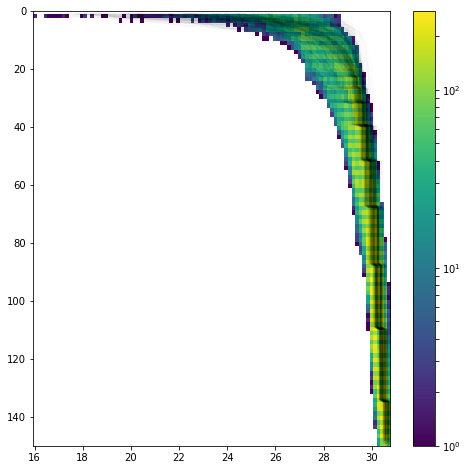

In [402]:
fig, ax = plt.subplots(figsize = (8,8))
c, xedges, yedges, im = ax.hist2d(x_new, y_new, 
                                  bins = 100, norm = LogNorm())
k = 0
for n in Lund.index:
    ax.plot(list_of_model_sal[:,k], 
               np.ma.masked_invalid(masked_depths[:,k]), 
             linestyle='-', c='k', alpha = 0.01)
    k = k + 1
fig.colorbar(im, ax=ax)
ax.set_ylim(150,0);

# Lund

salinity: bias =  0.213759189729
salinity: RMSE = 0.580654434797
salinity: Willmott = 0.933523464921
temperature: bias =  0.0217548255432
temperature: RMSE = 0.365140267405
temperature: Willmott = 0.981634892807


(array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb10003b160>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fb0fbbd0048>], dtype=object),
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0fa0a3898>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fb0f9ff0e10>], dtype=object))

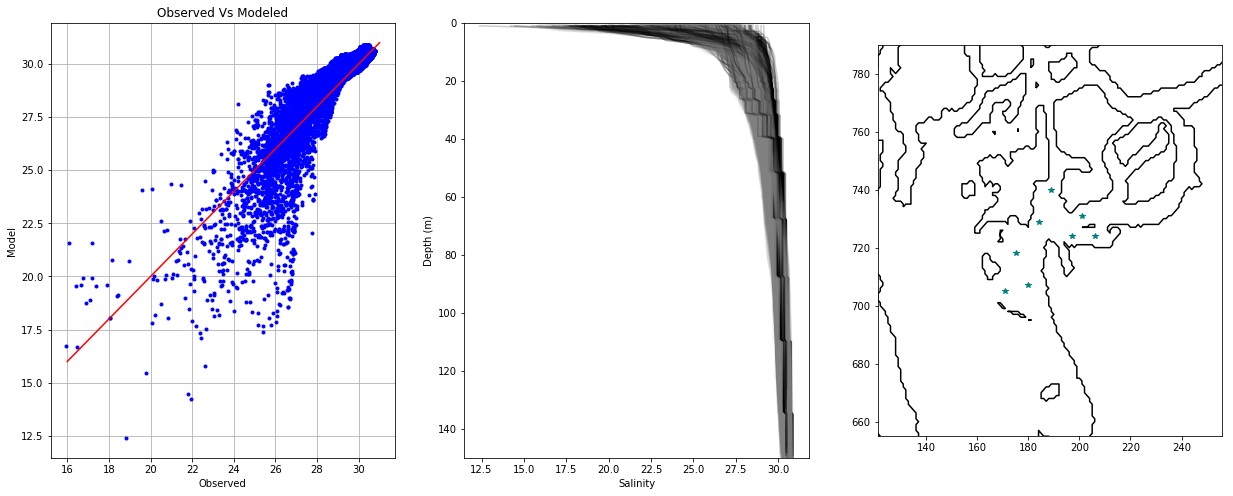

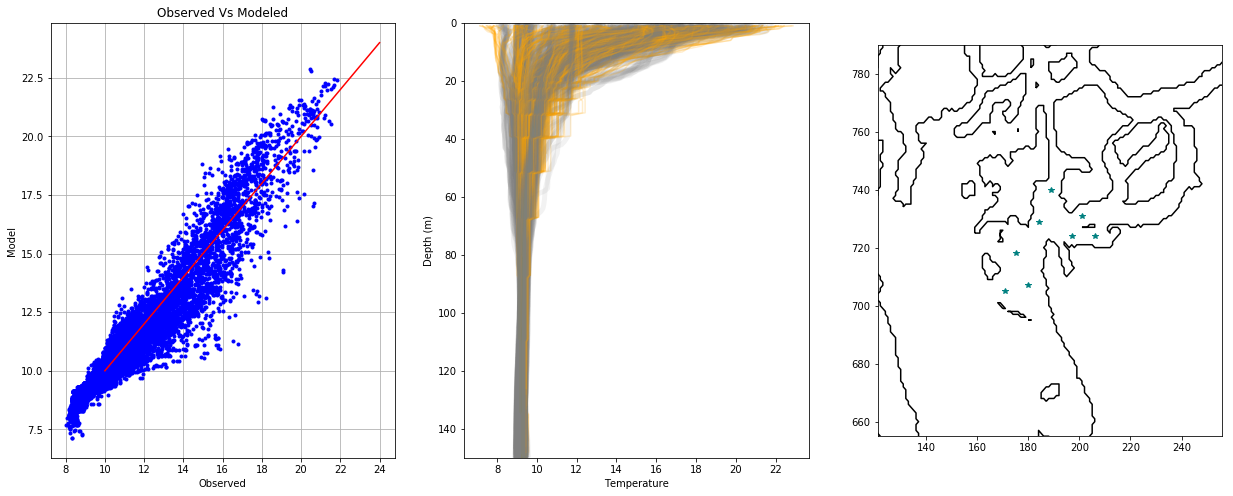

In [451]:
compare(stationdata.loc[stationdata['patrol'] == 1])

In [405]:
secondpatrol = stationdata.loc[stationdata['patrol'] == 2]

# Powell River

salinity: bias =  0.158360970682
salinity: RMSE = 0.596028433773
salinity: Willmott = 0.928611189987
temperature: bias =  -0.10843706775
temperature: RMSE = 0.489639909242
temperature: Willmott = 0.974690914611


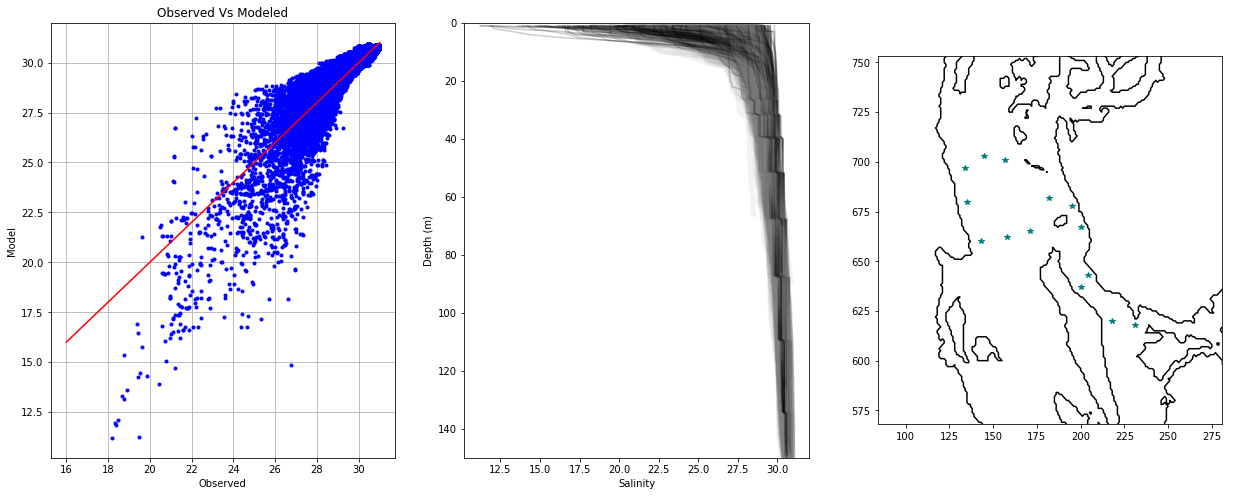

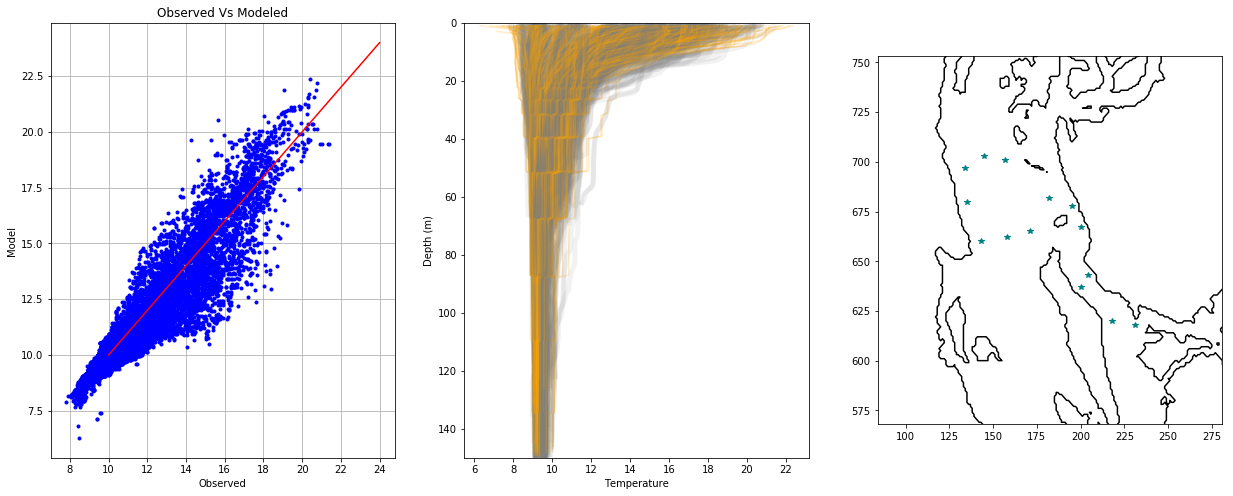

In [441]:
compare(secondpatrol);

In [424]:
thirdpatrol = stationdata.loc[stationdata['patrol'] == 3]

# Irvine/Sechelt

salinity: bias =  0.0350132919589
salinity: RMSE = 0.804955825852
salinity: Willmott = 0.938969207525
temperature: bias =  -0.122357657175
temperature: RMSE = 0.478677916098
temperature: Willmott = 0.979549515981


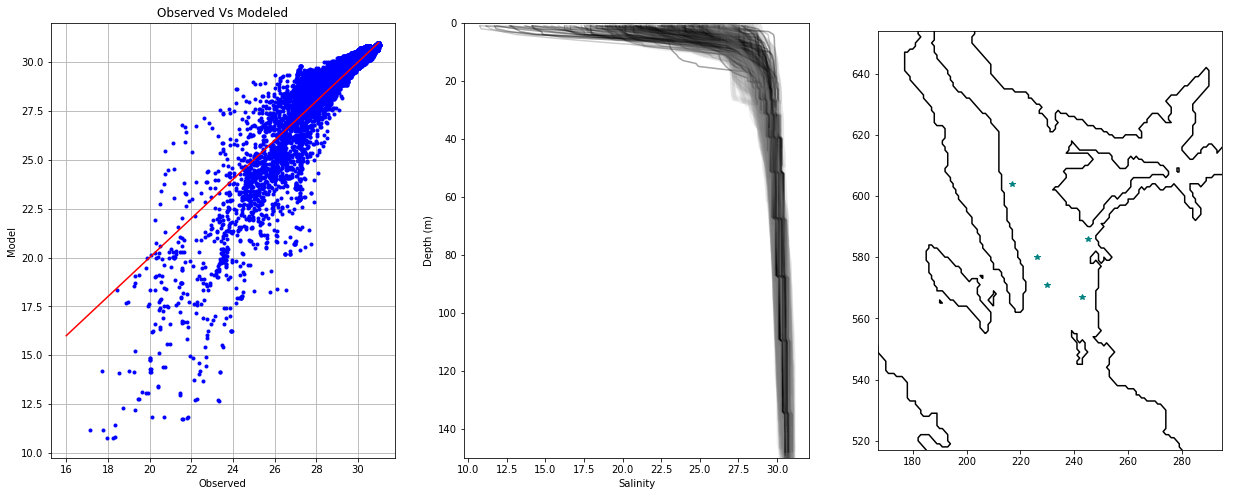

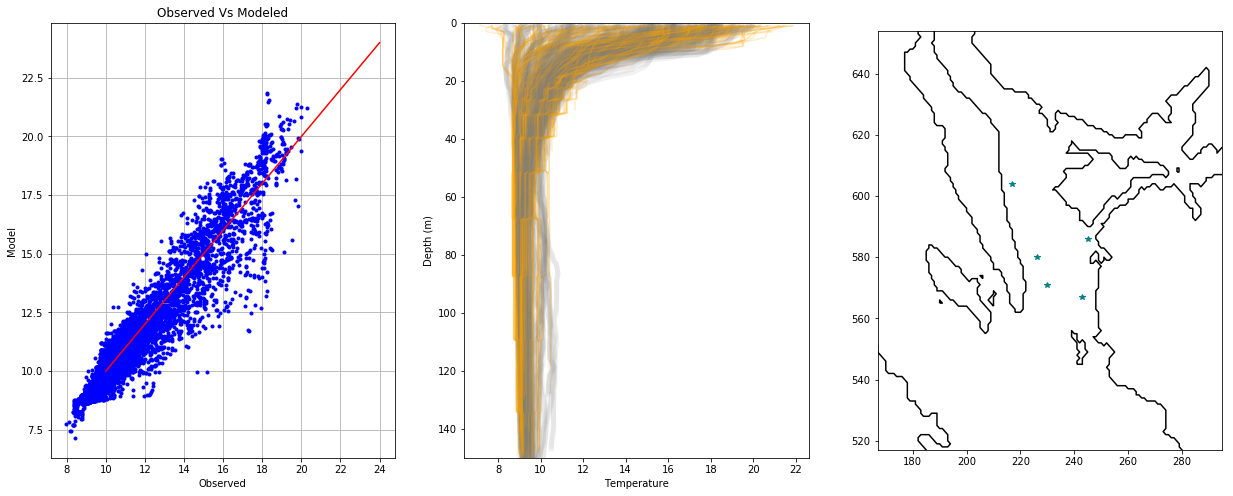

In [443]:
compare(thirdpatrol);

In [427]:
fourthpatrol = stationdata.loc[stationdata['patrol'] == 4]

# Baynes Sound

salinity: bias =  0.0920609165636
salinity: RMSE = 0.451959546775
salinity: Willmott = 0.943349524766
temperature: bias =  -0.0458435825074
temperature: RMSE = 0.539415206713
temperature: Willmott = 0.978979682455


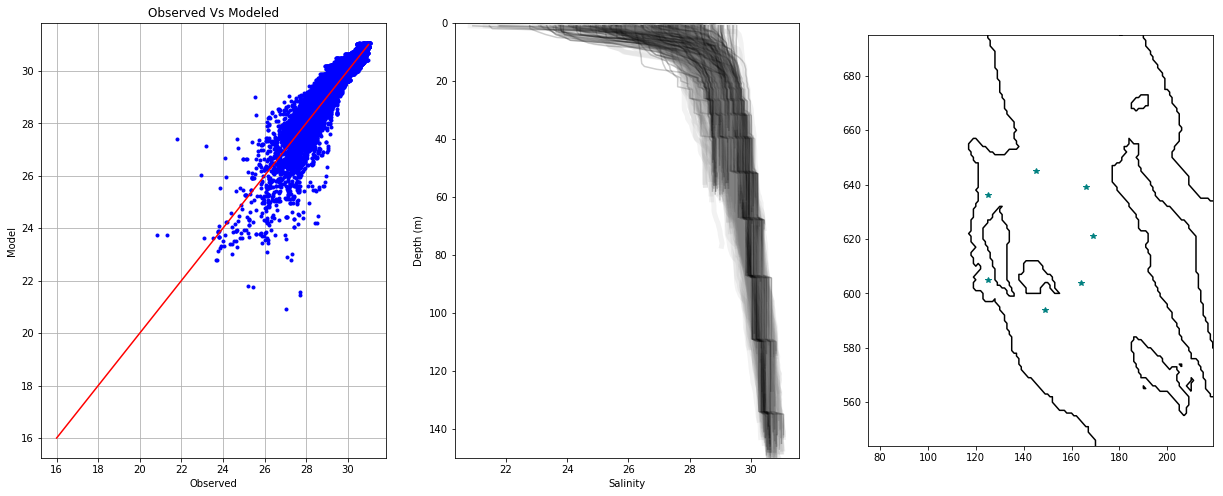

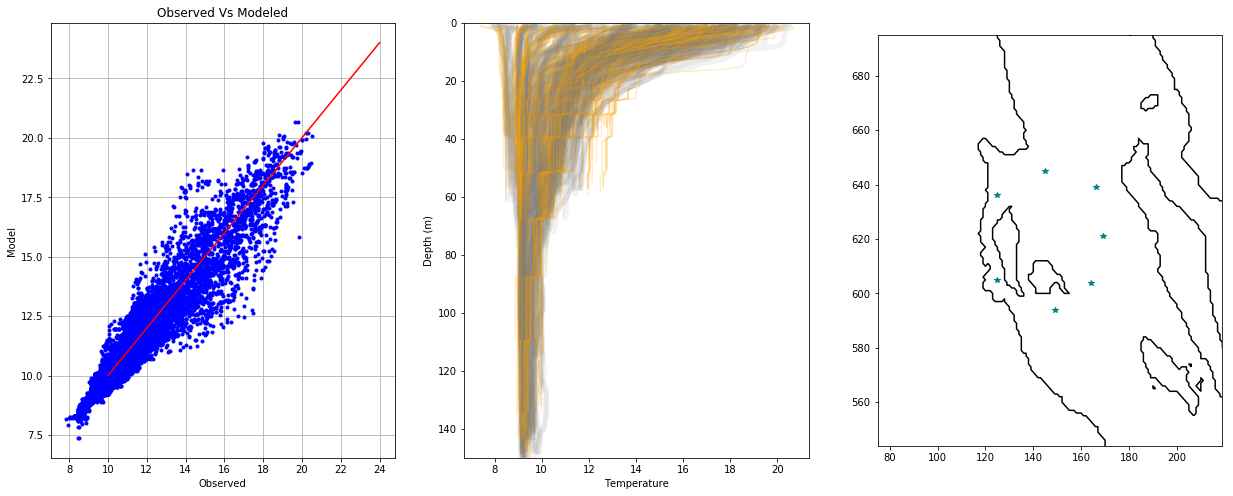

In [444]:
compare(fourthpatrol);

In [431]:
fifthpatrol = stationdata.loc[stationdata['patrol'] == 5]

# Nanaimo

salinity: bias =  0.0795537827108
salinity: RMSE = 0.626469556076
salinity: Willmott = 0.930350158835
temperature: bias =  -0.100462411376
temperature: RMSE = 0.438790632863
temperature: Willmott = 0.980411231258


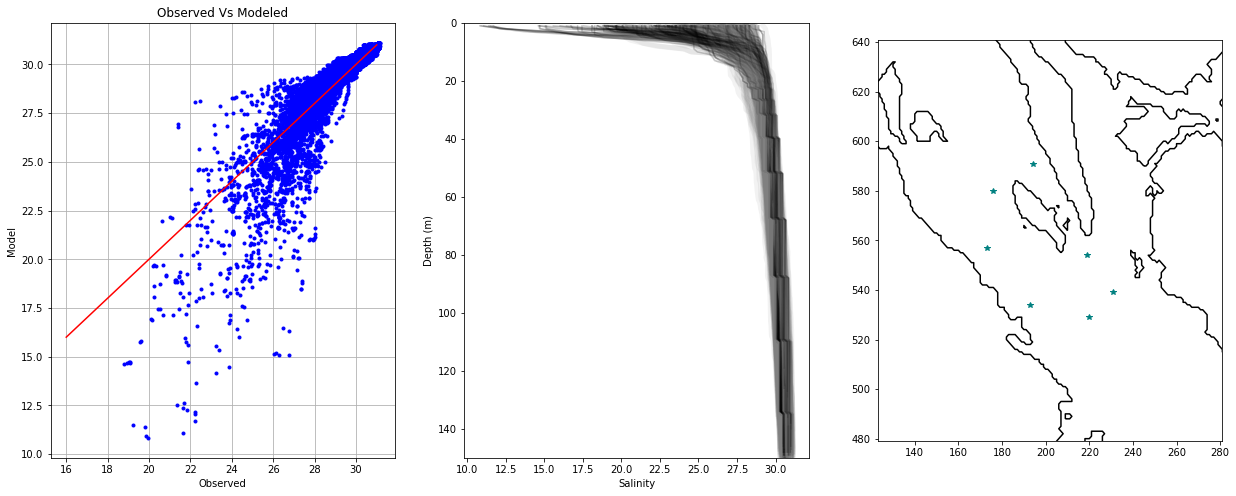

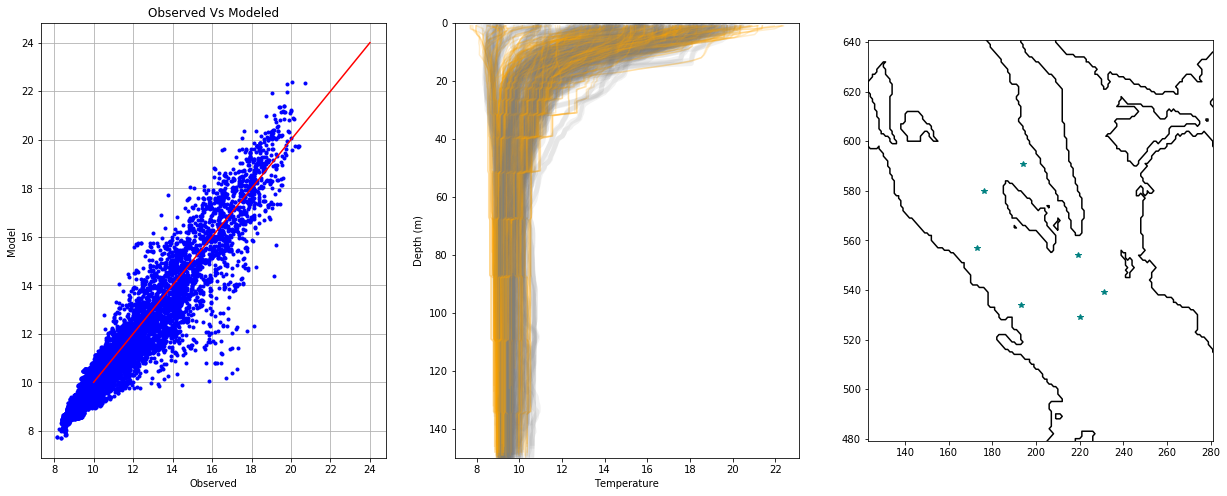

In [445]:
compare(fifthpatrol);

In [433]:
sixthpatrol = stationdata.loc[stationdata['patrol'] == 6]

# Campbell River

salinity: bias =  0.17112900541
salinity: RMSE = 0.477989343546
salinity: Willmott = 0.908637278641
temperature: bias =  -0.171705077474
temperature: RMSE = 0.524758230066
temperature: Willmott = 0.954719428299


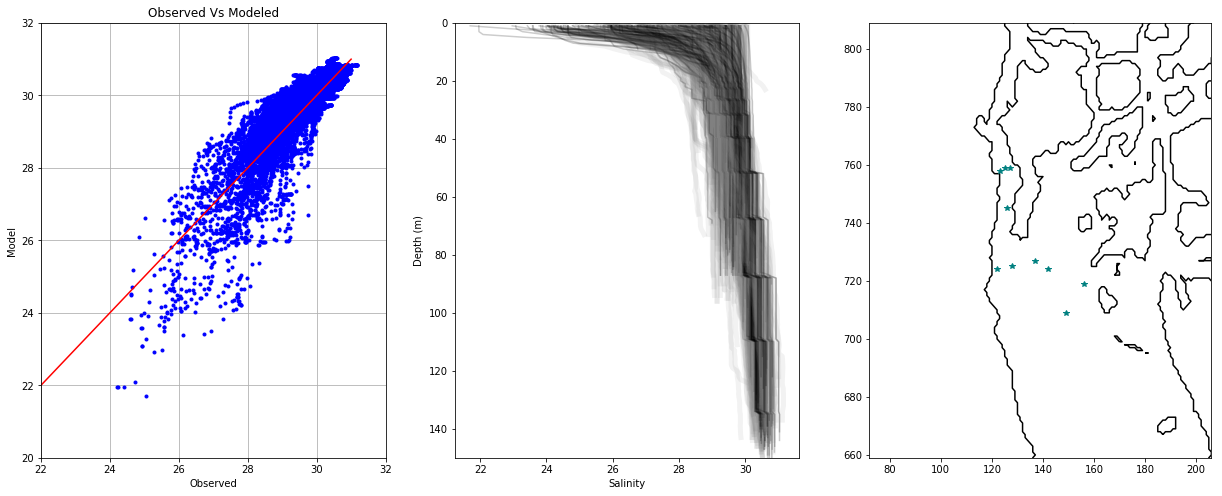

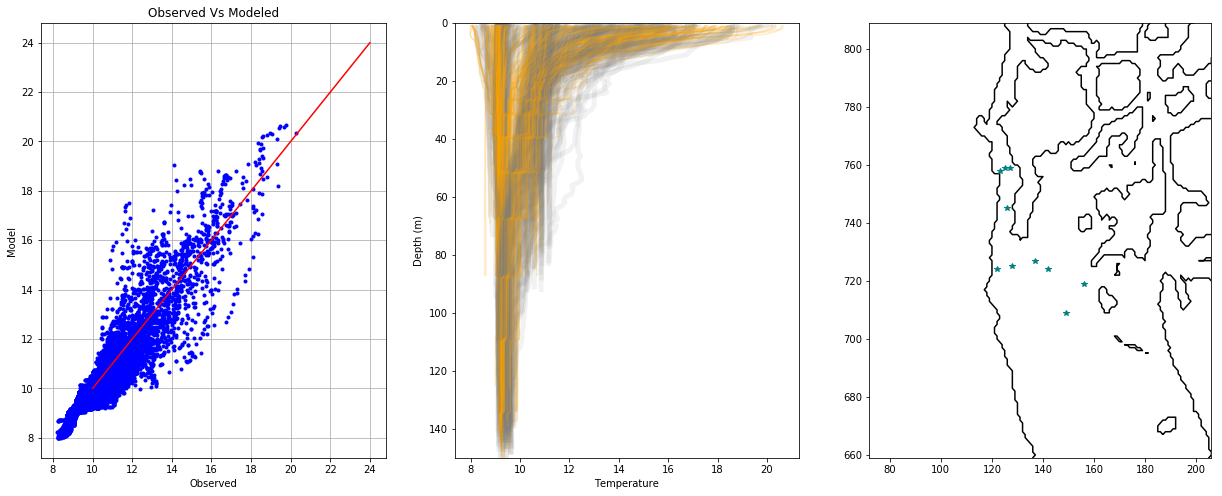

In [446]:
w, q = compare(sixthpatrol);
w[0].set_xlim(22, 32)
w[0].set_ylim(20, 32);

In [436]:
seventhpatrol = stationdata.loc[stationdata['patrol'] == 7]

# Ladysmith

salinity: bias =  -0.67374484131
salinity: RMSE = 0.972522615401
salinity: Willmott = 0.850516865856
temperature: bias =  0.326783576351
temperature: RMSE = 0.641274545384
temperature: Willmott = 0.979649712241


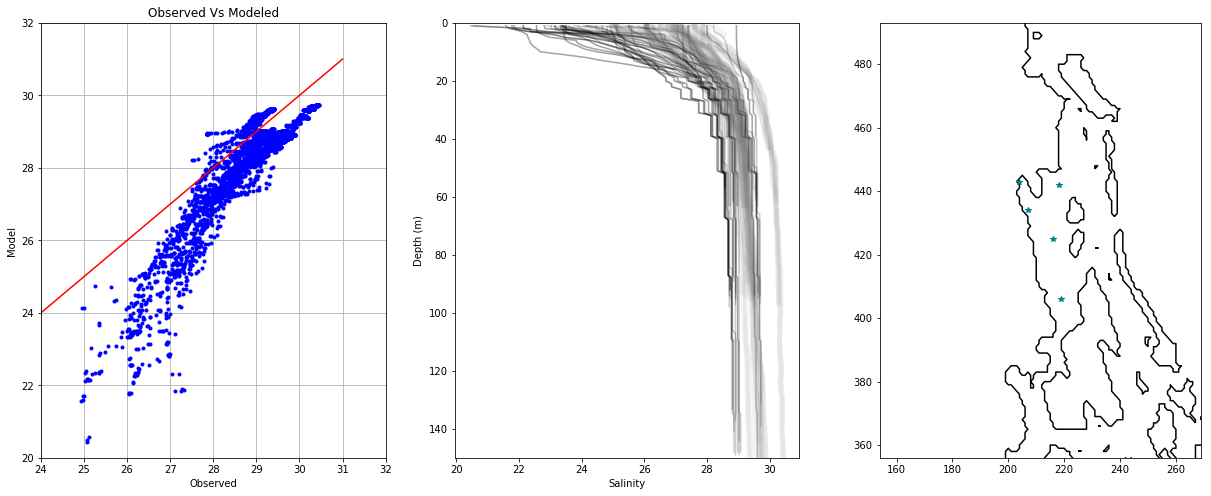

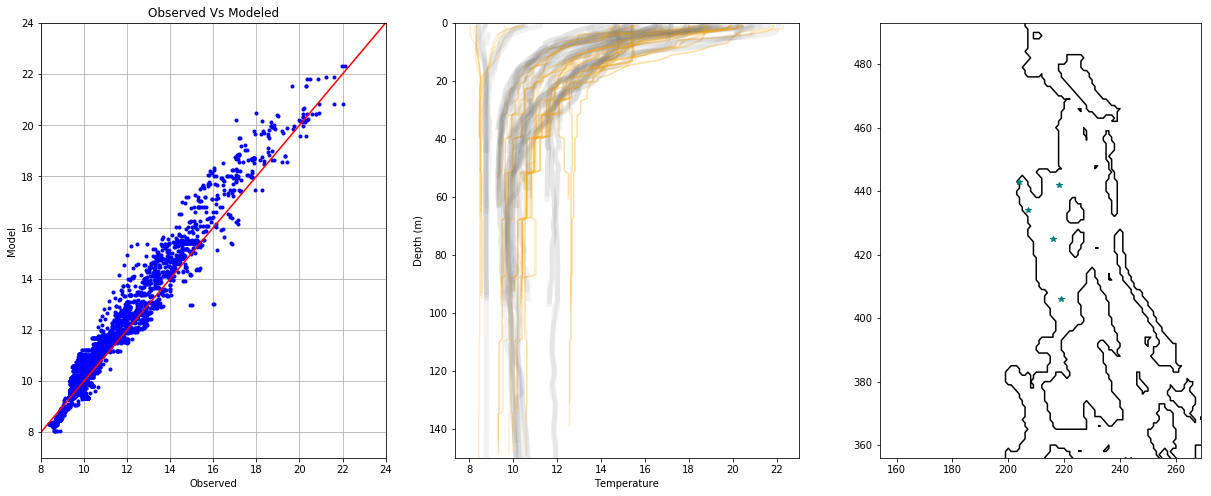

In [447]:
t, r = compare(seventhpatrol);
t[0].set_xlim(24, 32)
t[0].set_ylim(20, 32)
r[0].plot(np.arange(6,12), np.arange(6,12), 'r-')
r[0].set_xlim(8, 24)
r[0].set_ylim(7, 24);

# Steveston

salinity: bias =  -0.0898338243891
salinity: RMSE = 1.33149936825
salinity: Willmott = 0.920914699626
temperature: bias =  0.155167042692
temperature: RMSE = 0.683766246949
temperature: Willmott = 0.960240428237


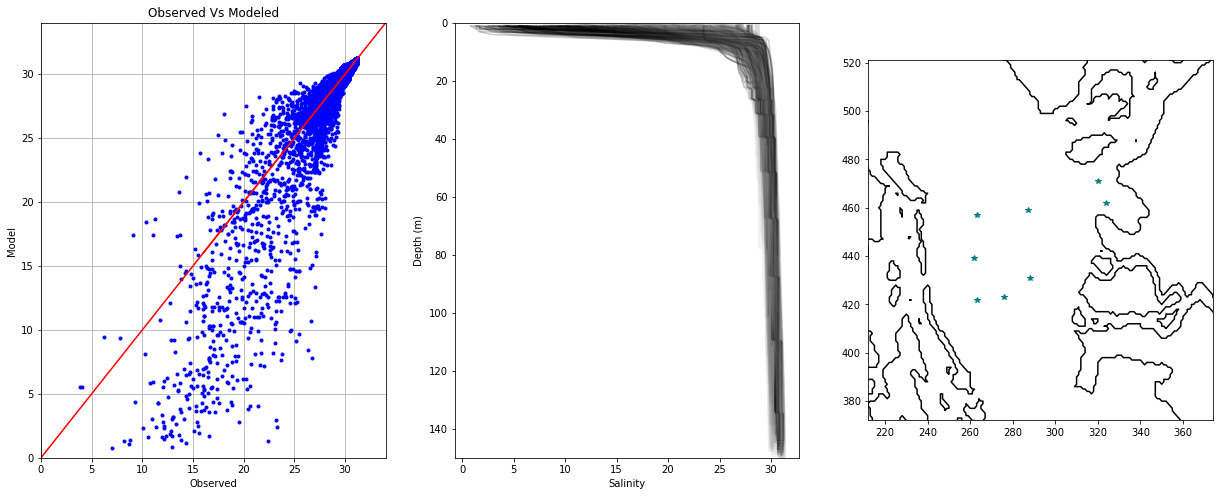

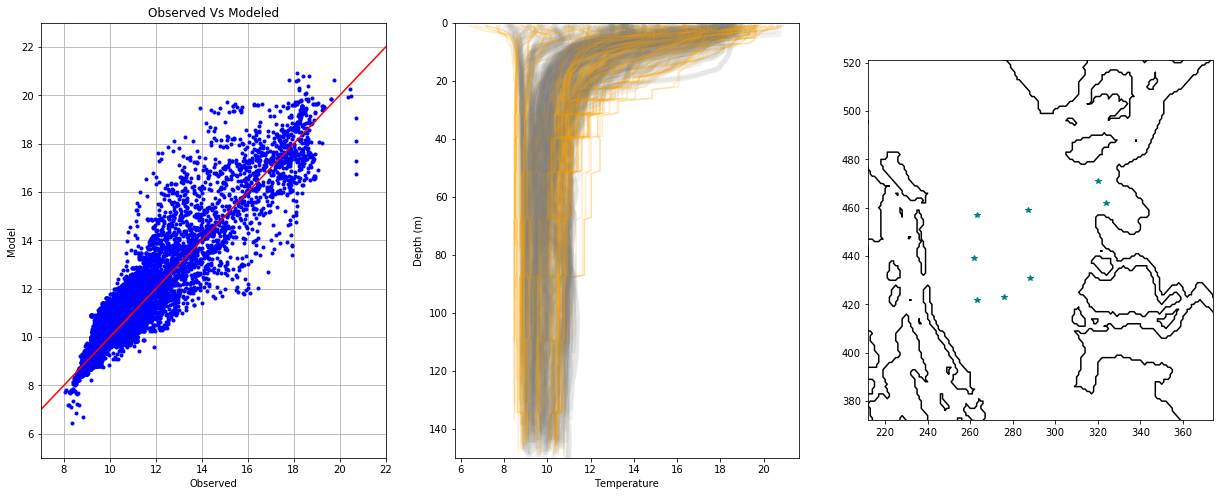

In [448]:
w, e = compare(stationdata.loc[stationdata['patrol'] == 8]);
w[0].plot(np.arange(0, 35), np.arange(0,35), 'r-')
w[0].set_ylim(0, 34)
w[0].set_xlim(0, 34)
e[0].plot(np.arange(6, 12), np.arange(6, 12), 'r-')
e[0].set_ylim(5, 23)
e[0].set_xlim(7, 22);

# Victoria 

salinity: bias =  -0.20233497913
salinity: RMSE = 0.727840782587
salinity: Willmott = 0.953261760961
temperature: bias =  0.313220441146
temperature: RMSE = 0.702927321891
temperature: Willmott = 0.929568520314


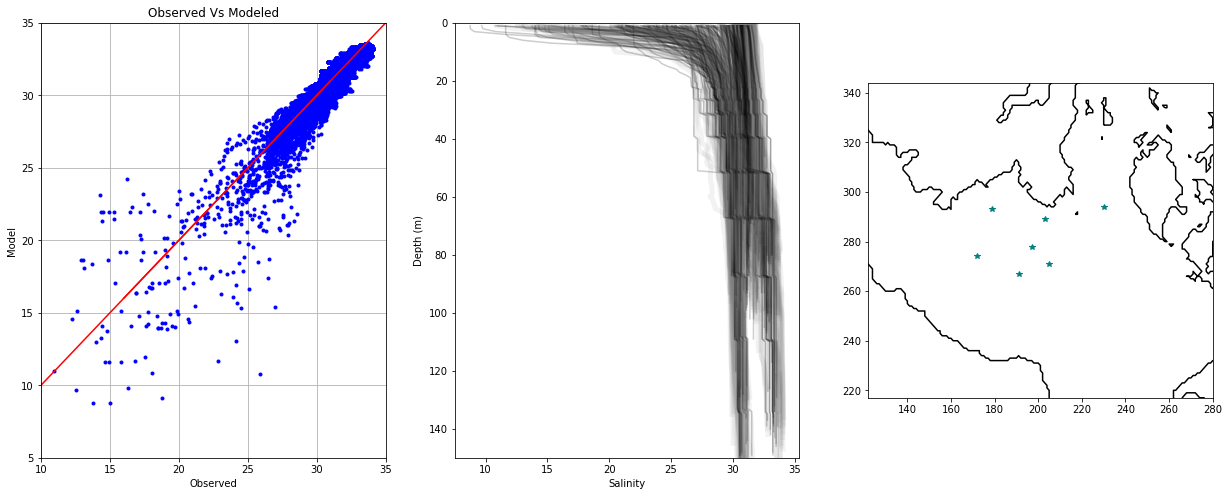

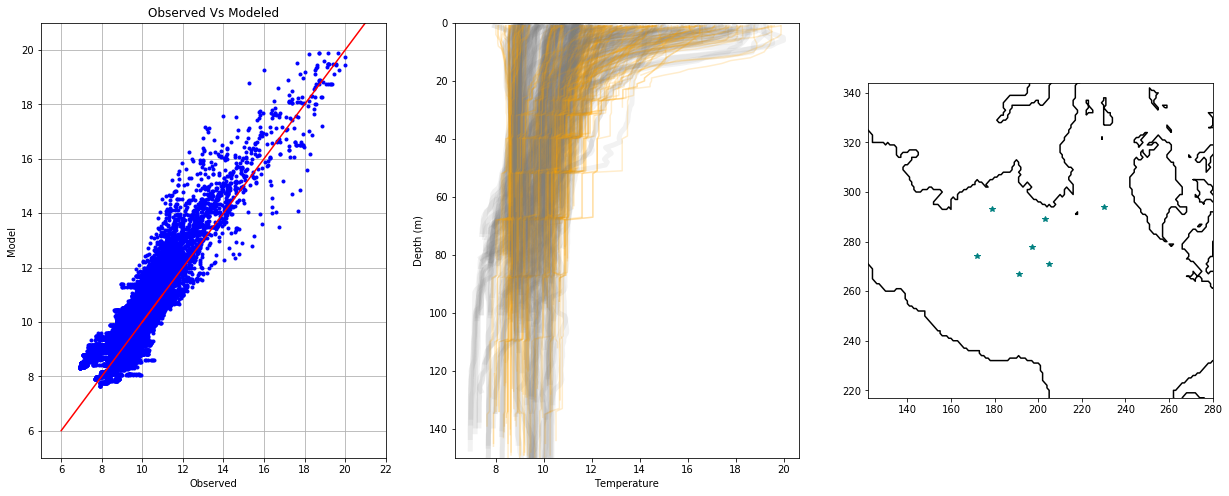

In [449]:
s, d = compare(stationdata.loc[stationdata['patrol'] == 9]);
s[0].plot(np.arange(9, 40), np.arange(9, 40), 'r-')
s[0].set_xlim(10, 35)
s[0].set_ylim(5, 35)
d[0].plot(np.arange(6, 12), np.arange(6, 12), 'r-')
d[0].set_xlim(5, 22)
d[0].set_ylim(5, 21);

# Cowichan Bay

salinity: bias =  -0.657910109198
salinity: RMSE = 1.11872857794
salinity: Willmott = 0.741498808308
temperature: bias =  0.271779680384
temperature: RMSE = 0.721403790119
temperature: Willmott = 0.957394977457


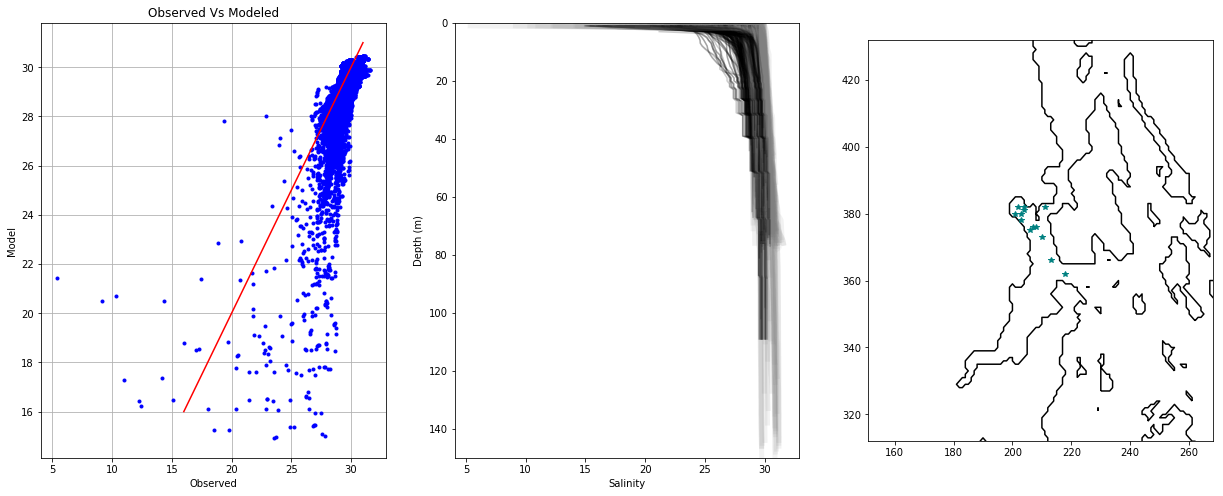

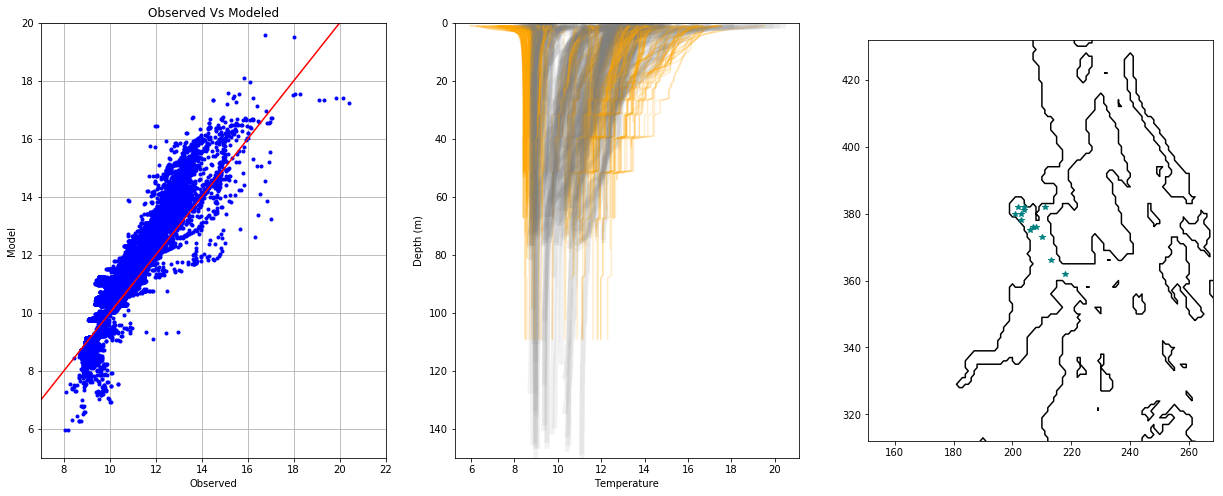

In [450]:
f, g = compare(stationdata.loc[stationdata['patrol'] == 10]);
g[0].set_xlim(7, 22)
g[0].set_ylim(5, 20)
g[0].plot(np.arange(3, 12), np.arange(3, 12), 'r-');

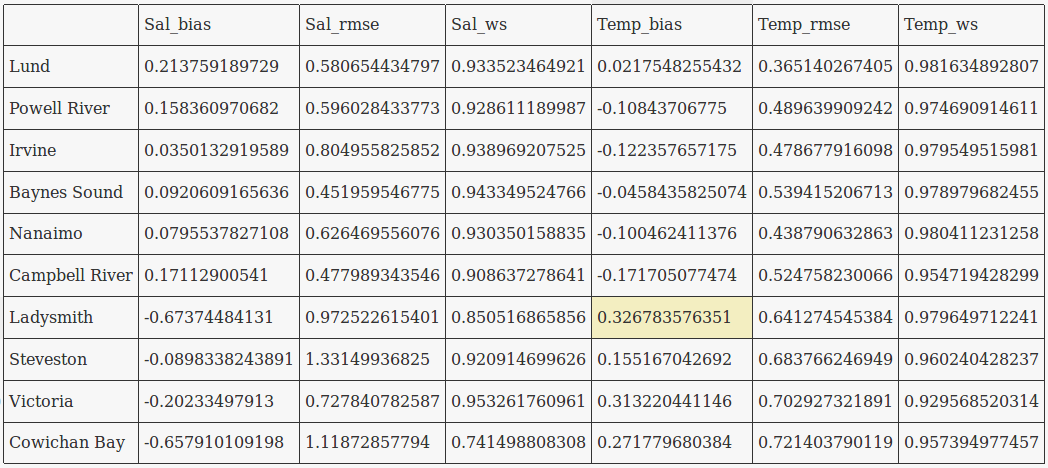

In [453]:
Image('/home/vdo/Pictures/statstable.png')